In [2]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [3]:
os.chdir(os.path.join(os.getcwd(), './data_final'))
files = os.listdir()


In [4]:
lang_str = 'C|C++|C#|PYTHON|JAVA|JAVASCRIPT|PHP|HTML|SQL|CSS|R|RUBY|PERL|SCALA|SWIFT|GO|MYSQL|Objective-c|VB|jQuery|ASP.NET'
language = lang_str.split('|')
# Initail all items = 0
all_result = {key.upper():0 for key in language}

asp_regex = '.net|ASP'
c_sharp_regex = 'C#.NET'
vb_regex = 'VB.NET|VBA|Visual basic|visual'
objc_regex = 'object c'

for file in files:
#     print(file)
    with open(file, 'r', encoding='utf-8') as f:
        pairs = f.read().split('\n')
        pairs = [pair for pair in pairs if len(pair)]  #if None = false
        lan = [pair.split(',')[0].upper() for pair in pairs]
        counts = [pair.split(',')[1] for pair in pairs]
        result = dict(zip(lan, counts))  # {k:v for (k,v) in zip(lan, couonts)}
        for key in result.keys():
            if key in all_result.keys():
                all_result[key] += int(result[key]) 
            if re.match(asp_regex, key, re.IGNORECASE):
                all_result['ASP.NET'] += int(result[key]) 
            if re.match(c_sharp_regex, key, re.IGNORECASE):
                all_result['C#'] += int(result[key]) 
            if re.match(vb_regex, key, re.IGNORECASE):
                all_result['VB'] += int(result[key]) 
            if re.match(objc_regex, key, re.IGNORECASE):
                all_result['VB'] += int(result[key])

             Counts
Language           
C              1649
JAVA           1532
C++            1326
JAVASCRIPT     1150
PHP            1105
HTML           1070
C#             1050
ASP.NET         983
MYSQL           818
JQUERY          764
VB              762
SQL             499
PYTHON          471
RUBY            227
OBJECTIVE-C     215
R               137
PERL            110
CSS              91
SWIFT            54
GO                7
SCALA             0


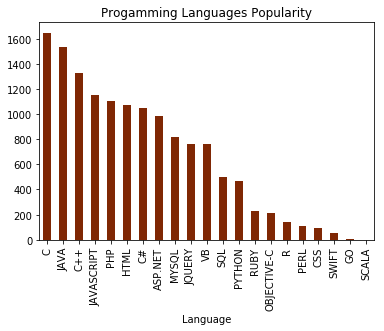

In [5]:
# Method-1

result_list = [(k,v) for (k,v) in all_result.items()]

df = pd.DataFrame(result_list)
df.columns = ['Language', 'Counts']
df = df.set_index(['Language'], drop=True)

# Sort dataframe
sort_df = df.sort_values(by="Counts", ascending=False)

# Plot chart
plt.figure(figsize=(100,100))
sort_df.plot(kind='bar', title='Progamming Languages Popularity', fontsize=10, legend=False, colormap='Oranges_r')
print(sort_df)
plt.show()

In [6]:
df

,Counts
Language,
C,1649
C++,1326
C#,1050
PYTHON,471
JAVA,1532
JAVASCRIPT,1150
PHP,1105
HTML,1070
SQL,499


In [56]:
import json
result_list = [(k,v) for (k,v) in all_result.items()]

counList = []
for idx in result_list:
    counList.append(idx[0]+','+str(idx[1]))
    
with open('./total_lan.csv','w') as fw:
    fw.write('\n'.join(counList))
#     for idx in result_list:
#         print(idx[0],idx[1])
# with open('./total_lan.json', 'w') as fw1:
#     for idx in result_list:
#         json.dump(idx,fw1)
    
counList

['C,1649',
 'C++,1326',
 'C#,1050',
 'PYTHON,471',
 'JAVA,1532',
 'JAVASCRIPT,1150',
 'PHP,1105',
 'HTML,1070',
 'SQL,499',
 'CSS,91',
 'R,137',
 'RUBY,227',
 'PERL,110',
 'SCALA,0',
 'SWIFT,54',
 'GO,7',
 'MYSQL,818',
 'OBJECTIVE-C,215',
 'VB,762',
 'JQUERY,764',
 'ASP.NET,983']

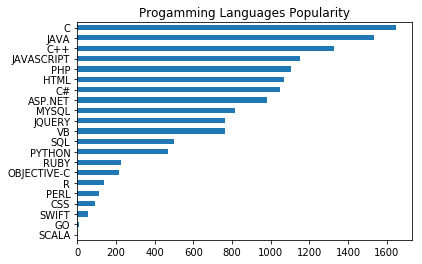

In [9]:
# Method-2

Languages = [key for key in all_result.keys()]
Counts = [value for value in all_result.values()]

df2 = pd.DataFrame(Counts, index=Languages, columns=['Counts'])
# df2 = pd.Series(Counts, index=pd.Series(Languages))    #Alternative way to create series

sort_df2 = df2.sort_values(by="Counts", ascending=True)

plt.figure(figsize=(100,100))
sort_df2.plot(kind='barh', title='Progamming Languages Popularity', fontsize=10, legend=False)
# print(sort_df2)
plt.show()

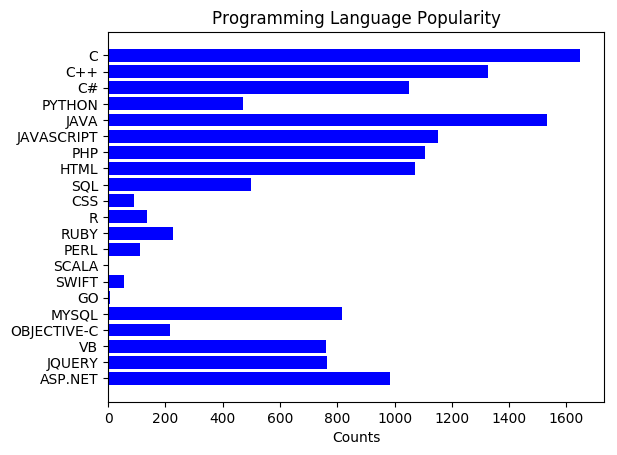

In [10]:
# Method-3
import matplotlib.pyplot as plt
import numpy as np

sorted_result = sorted(all_result.items(), key=lambda x:x[1], reverse=True)

Languages = [key for key in all_result.keys()]
Counts = [value for value in all_result.values()]

plt.rcdefaults()
fig, ax = plt.subplots()



lang = Languages
y_pos = np.arange(len(Languages))
# error = np.random.rand(len(Languages))

ax.barh(y_pos, Counts, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(lang)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Counts')
ax.set_title('Programming Language Popularity')

plt.show()



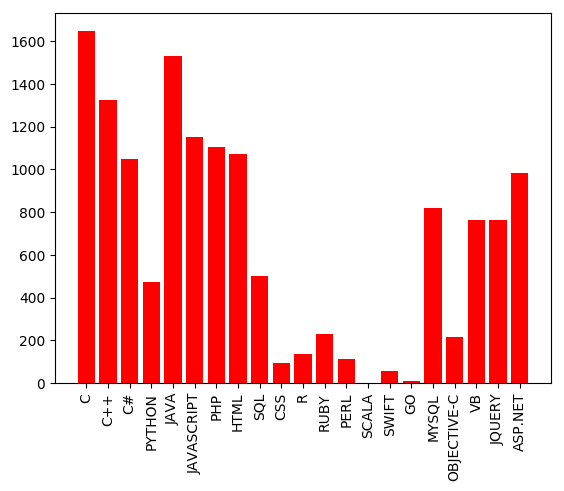

In [17]:
# Method-4
import matplotlib.pyplot as plt
plt.bar(range(len(list(all_result.values()))), list(all_result.values()), color='r', width=0.8, tick_label=list(all_result.keys()))
plt.xticks(rotation=90)
plt.show()

In [13]:
range(len(list(all_result.values())))

range(0, 21)

In [14]:
len(list(all_result.values()))

21

In [18]:
list(all_result.values())

[1649,
 1326,
 1050,
 471,
 1532,
 1150,
 1105,
 1070,
 499,
 91,
 137,
 227,
 110,
 0,
 54,
 7,
 818,
 215,
 762,
 764,
 983]

In [19]:
list(all_result.keys())

['C',
 'C++',
 'C#',
 'PYTHON',
 'JAVA',
 'JAVASCRIPT',
 'PHP',
 'HTML',
 'SQL',
 'CSS',
 'R',
 'RUBY',
 'PERL',
 'SCALA',
 'SWIFT',
 'GO',
 'MYSQL',
 'OBJECTIVE-C',
 'VB',
 'JQUERY',
 'ASP.NET']